<h2> Mukul Shingwani</h2>
<h3> B20AI023 </h3>
<h3> DL lab 2</h3>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm
from sklearn.manifold import TSNE
import torch
import torchvision  # for dataset
import torch.nn as nn   # for neural networks
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_data = datasets.FashionMNIST(root='.', train=True, transform=ToTensor(), download=True)
test_data = datasets.FashionMNIST(root='.', train=False, transform=ToTensor(), download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
len(train_data)

60000

In [ ]:
len(test_data)

10000

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
len(train_data.classes)

10

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
img, label = train_data[0]
print(img.shape)

torch.Size([1, 28, 28])


In [ ]:
print(label)
img

9


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, 8, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize = (16,8))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print('labels:', labels)

labels: tensor([2, 1, 6, 4, 7, 0, 2, 0])


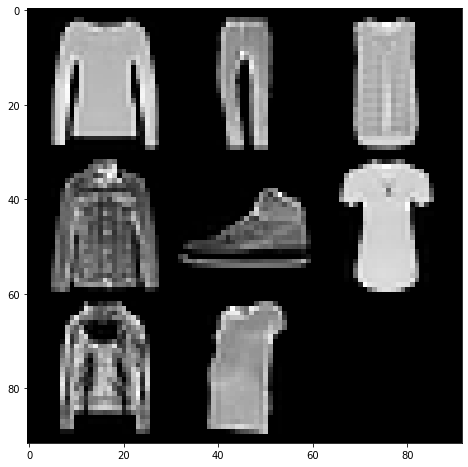

In [ ]:
show_transformed_images(train_data)

### Architecture of Denoising AutoEncoder

In [ ]:
class Denoising_Autoencoder(nn.Module):
    def __init__(self):
        super(Denoising_Autoencoder, self).__init__()
        
        # since my roll no is odd, defining 4 linear layers in encoder and decoder 

        # encoder structure
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.Sigmoid(),
            nn.Linear(512, 256),
            nn.Sigmoid(),
            nn.Linear(256, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid()
        )
        # latent space(bottlencek of 64)

        # decoder structure
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 256),
            nn.Sigmoid(),
            nn.Linear(256, 512),
            nn.Sigmoid(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )

    # forward pass
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiating the model
model = Denoising_Autoencoder()


In [ ]:

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

### train the model

In [ ]:
# using the adam optimizer
optimizer = optim.Adam(model.parameters())
# using Binary cross entropy loss
criterion = nn.BCELoss()

with tqdm(total=len(train_loader)) as pbar:
  # for 10 epochs
  for epoch in range(10):
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):
          images, labels = data
          optimizer.zero_grad()
          images = images.view(-1,784)  # flattening

          # Add noise to the input images of 20%
          noise = torch.randn(images.size()) * 0.2
          images_with_noise = images + noise

          # Forward pass
          outputs = model(images_with_noise)
          loss = criterion(outputs, images) # comaparing the otuput with the origianl image and not the noisy image, so that
                                            # the model learns how to ignore the noise
          
          # Backward and optimize
          optimizer.zero_grad()
          # backpropagate
          loss.backward()
          optimizer.step()
          # updating the loss
          running_loss += loss.item()
          pbar.set_postfix()
          pbar.update(1)
      print(f'Epoch {epoch + 1} loss: {running_loss / len(train_loader)}')
  print()

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1 loss: 0.46954180926148065
Epoch 2 loss: 0.40457185384815436
Epoch 3 loss: 0.3750155787351035
Epoch 4 loss: 0.34194341416297946
Epoch 5 loss: 0.333741498336609
Epoch 6 loss: 0.32968721931168776
Epoch 7 loss: 0.32720962916610086
Epoch 8 loss: 0.3256320054215917
Epoch 9 loss: 0.3243797059252318
Epoch 10 loss: 0.32329884152422583



In [ ]:
import copy
model2 = copy.deepcopy(model)

a deep copy of model was made, to be used for further parts

###test the model

In [ ]:
# Test the model
with torch.no_grad():
    mse = nn.MSELoss()  # loss function
    for images, labels in test_data:
        images = images.view(-1, 784) # flatten

        # Add noise to the input images of 20%
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise

        # output images
        outputs = model(images_noisy)

        # Compare the outputs with the original images
        loss = mse(outputs, images)
    print('MSE of the model: {}'.format(loss.item()))


MSE of the model: 0.016665257513523102


In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

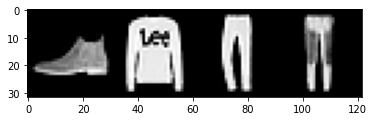

In [ ]:
import torchvision

for images, _ in test_loader:
  break

imshow(torchvision.utils.make_grid(images[:4]))


## Part 1

we add 1 fully connected layer with sigmoid activation fucntion, in the end of the encoder. 
<br>
The output of this layer represents the predicted class

In [ ]:
# # Freeze the layers 
# for param in model.parameters():
#     param.requiresGrad = False

# Adding a FC layer for classification
classifier1 = nn.Sequential(
    nn.Linear(64, 10),
    nn.Sigmoid()  # roll no is odd
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier1.parameters(), lr=0.001)

### train the classifier

In [ ]:
loss_train = []
for epoch in range(10):
    for images, labels in train_loader:
        images = images.view(-1, 784) # flatten
        # Add noise to the input images with factor 20%
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        
        # Get the encoded features from encoder (discarding the decoder)
        features = model.encoder(images_noisy)
        # Make the predictions
        outputs = classifier1(features)
        labels = torch.LongTensor(labels)

        # comapring reconstructed image label to original image label
        loss = criterion(outputs, labels)
  
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))
    loss_train.append(loss.item())


Epoch [1/10], Loss: 1.9112
Epoch [2/10], Loss: 1.8600
Epoch [3/10], Loss: 1.8775
Epoch [4/10], Loss: 1.7973
Epoch [5/10], Loss: 1.8134
Epoch [6/10], Loss: 1.8119
Epoch [7/10], Loss: 1.8086
Epoch [8/10], Loss: 1.7677
Epoch [9/10], Loss: 1.7860
Epoch [10/10], Loss: 1.7922


### test the classifier

In [ ]:
acc1 = 0.0

lt_embed = []
lt_lb = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 784)
        # Add noise to the input images
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        # Get just the encoded features
        features = model.encoder(images_noisy.to(device).view(-1,784))
        # for tsne plots
        lt_embed.append(features.cpu())
        lt_lb.append(labels)
        # Make the predictions, after passing it through the classifier
        outputs = classifier1(features)
        predicted = torch.argmax(outputs.data, 1)
        total += labels.size(0)
        labels = torch.LongTensor(labels)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the classifier: {} %'.format(100 * correct / total))
    acc1 = 100 * (correct / total)

embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb)

Accuracy of the classifier: 34.99 %


In [ ]:
acc1

34.99

In [ ]:
loss_test1 = []
acc_fc1 = []
for epoch in range(10):
    for images, labels in train_loader:
        images = images.view(-1, 784) # flatten
        # Add noise to the input images with factor 20%
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        
        # Get the encoded features from encoder (discarding the decoder)
        features = model.encoder(images_noisy)
        # Make the predictions
        outputs = classifier1(features)
        labels = torch.LongTensor(labels)

        # comapring reconstructed image label to original image label
        loss = criterion(outputs, labels)
  
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))
    acc1 = 0.0

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.view(-1, 784)
            # Add noise to the input images
            noise = torch.randn(images.size()) * 0.2
            images_noisy = images + noise
            # Get just the encoded features
            features = model.encoder(images_noisy.to(device).view(-1,784))
            
            # Make the predictions, after passing it through the classifier
            outputs = classifier1(features)
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            labels = torch.LongTensor(labels)
            losss = criterion(outputs, labels)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the classifier: {} %'.format(100 * correct / total))
        acc1 = 100 * (correct / total)
        loss_test1.append(losss.item())
        acc_fc1.append(acc1)



Epoch [1/10], Loss: 1.7714
Accuracy of the classifier: 34.85 %
Epoch [2/10], Loss: 1.7570
Accuracy of the classifier: 35.29 %
Epoch [3/10], Loss: 1.7646
Accuracy of the classifier: 35.31 %
Epoch [4/10], Loss: 1.7696
Accuracy of the classifier: 35.25 %
Epoch [5/10], Loss: 1.7443
Accuracy of the classifier: 35.14 %
Epoch [6/10], Loss: 1.7803
Accuracy of the classifier: 35.3 %
Epoch [7/10], Loss: 1.7863
Accuracy of the classifier: 35.4 %
Epoch [8/10], Loss: 1.7276
Accuracy of the classifier: 35.46 %
Epoch [9/10], Loss: 1.7682
Accuracy of the classifier: 35.9 %
Epoch [10/10], Loss: 1.7640
Accuracy of the classifier: 35.35 %


In [ ]:
loss_test1

[1.7455885410308838,
 1.745235562324524,
 1.740022897720337,
 1.729872465133667,
 1.7330551147460938,
 1.729719638824463,
 1.723836064338684,
 1.7197978496551514,
 1.7127355337142944,
 1.7144335508346558]

In [ ]:
acc_fc1

[34.849999999999994,
 35.29,
 35.31,
 35.25,
 35.14,
 35.3,
 35.4,
 35.46,
 35.9,
 35.35]

here 1st row represents, original image
<br>
2nd row: noisy image
<br>
3rd row: reconstructed image

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([784])) that is different to the input size (torch.Size([1, 784])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


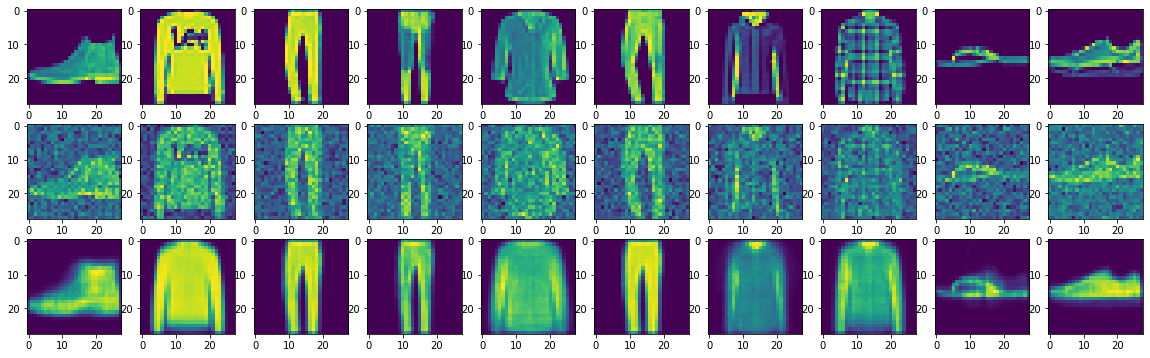

In [ ]:
r_loss1 = 0
test_image, test_label = next(iter(test_loader))
test_image2 = test_image.view(-1, 784)

# Adding noise to the image
noise = torch.randn(test_image2.size()) * 0.2
noisy_image = test_image2 + noise

# Pass the noisy image to the model, which has got its weights chagned due to
# introduction of 1 FC layer earlier, now we simply don't use the FC layer and
# pass the noisy image through the full model (encoder + decoder)
reconstructed_image = model(noisy_image)

# print(test_image.shape)
# print(noisy_image.shape)
# print(reconstructed_image.shape)

fig, axs = plt.subplots(3, 10, figsize=(20, 6))
for i in range(10):
    r_loss1 += nn.MSELoss()(test_image[i].view(-1,784),reconstructed_image[i])
    axs[0][i].imshow(test_image[i].numpy().squeeze().reshape(28,28))
    axs[1][i].imshow(noisy_image[i].detach().numpy().squeeze().reshape(28,28))
    axs[2][i].imshow(reconstructed_image[i].detach().numpy().squeeze().reshape(28,28))
plt.show()


In [ ]:
print('Reconstruction loss for these 10 images : ',r_loss1.item())

Reconstruction loss for these 10 images :  0.2518027126789093


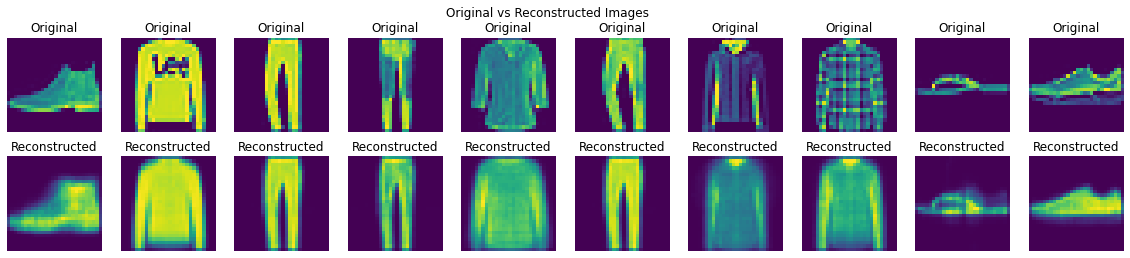

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))
axes = axes.ravel()
for i in range(10):
    image, label = test_data[i]
    image = image.view(-1, 784)
  
    noise = torch.randn(image.size()) * 0.2
    image_noisy = image + noise
   
    reconstructed = model(image_noisy)
    
    axes[i].imshow(image.view(28, 28))
    axes[i+10].imshow(reconstructed.view(28, 28).detach().numpy())
    axes[i].set_title("Original")
    axes[i+10].set_title("Reconstructed")
    axes[i].axis('off')
    axes[i+10].axis('off')
plt.suptitle("Original vs Reconstructed Images")
plt.show()


## Part 2

in this now we use the deep copied model, whcih we trained earlier

In [ ]:
# # we Freeze the layers of the autoencoder
# for param in model2.parameters():
#     param.requiresGrad = False

# Adding 3 FC layer for classification
classifier2 = nn.Sequential(
    nn.Linear(64, 64),
    nn.Sigmoid(),  # roll no is odd
    nn.Linear(64, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10),
    nn.Sigmoid()
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier2.parameters(), lr=0.001)

### train the classifier

In [ ]:
loss_train2=[]
for epoch in range(10):
    for images, labels in train_loader:
        images = images.view(-1, 784)
        # Add noise to the input images with factor 20%
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        # Get the encoded features from encoder (discarding the decoder)
        features = model2.encoder(images_noisy)
        # Make the predictions
        outputs = classifier2(features)
        labels = torch.LongTensor(labels)

        # comapring reconstructed image label to original image label
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))
    loss_train2.append(loss.item())


Epoch [1/10], Loss: 1.8337
Epoch [2/10], Loss: 1.7611
Epoch [3/10], Loss: 1.7231
Epoch [4/10], Loss: 1.6734
Epoch [5/10], Loss: 1.6985
Epoch [6/10], Loss: 1.6717
Epoch [7/10], Loss: 1.7079
Epoch [8/10], Loss: 1.7320
Epoch [9/10], Loss: 1.7100
Epoch [10/10], Loss: 1.7161


### test the classifier

In [ ]:
acc2 =0.0
lt_embed2 = []
lt_lb2 = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 784)
        # Add noise to the input images
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        # Get the encoded features
        features = model2.encoder(images_noisy.to(device).view(-1,784))
        # for tsne plots
        lt_embed2.append(features.cpu())
        lt_lb2.append(labels)
        # Make the predictions
        outputs = classifier2(features)
        predicted = torch.argmax(outputs.data, 1)
        total += labels.size(0)
        labels = torch.LongTensor(labels)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the classifier: {} %'.format(100 * (correct / total)))
    acc2 = 100 * (correct / total)

embed_tensor2 = torch.cat(lt_embed2)
label_tensor2 = torch.cat(lt_lb2)


Accuracy of the classifier: 39.76 %


In [ ]:
acc2

39.76

In [ ]:
loss_test2 = []
acc_fc2 = []
for epoch in range(10):
    for images, labels in train_loader:
        images = images.view(-1, 784) # flatten
        # Add noise to the input images with factor 20%
        noise = torch.randn(images.size()) * 0.2
        images_noisy = images + noise
        
        # Get the encoded features from encoder (discarding the decoder)
        features = model2.encoder(images_noisy)
        # Make the predictions
        outputs = classifier1(features)
        labels = torch.LongTensor(labels)

        # comapring reconstructed image label to original image label
        loss = criterion(outputs, labels)
  
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))
    acc2 = 0.0

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.view(-1, 784)
            # Add noise to the input images
            noise = torch.randn(images.size()) * 0.2
            images_noisy = images + noise
            # Get just the encoded features
            features = model2.encoder(images_noisy.to(device).view(-1,784))
            
            # Make the predictions, after passing it through the classifier
            outputs = classifier1(features)
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            labels = torch.LongTensor(labels)
            losss = criterion(outputs, labels)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the classifier: {} %'.format(100 * correct / total))
        acc2 = 100 * (correct / total)
        loss_test2.append(losss.item())
        acc_fc2.append(acc2)



Epoch [1/10], Loss: 1.7563
Accuracy of the classifier: 35.34 %
Epoch [2/10], Loss: 1.7348
Accuracy of the classifier: 35.47 %
Epoch [3/10], Loss: 1.7751
Accuracy of the classifier: 35.42 %
Epoch [4/10], Loss: 1.7595
Accuracy of the classifier: 35.44 %
Epoch [5/10], Loss: 1.7160
Accuracy of the classifier: 35.49 %
Epoch [6/10], Loss: 1.7673
Accuracy of the classifier: 35.47 %
Epoch [7/10], Loss: 1.7489
Accuracy of the classifier: 35.41 %
Epoch [8/10], Loss: 1.7609
Accuracy of the classifier: 35.38 %
Epoch [9/10], Loss: 1.7633
Accuracy of the classifier: 35.36 %
Epoch [10/10], Loss: 1.7626
Accuracy of the classifier: 35.45 %


In [ ]:
loss_test2

[1.7208606004714966,
 1.7210233211517334,
 1.721395492553711,
 1.727655291557312,
 1.717854380607605,
 1.720375418663025,
 1.7114211320877075,
 1.7183091640472412,
 1.7175929546356201,
 1.7154282331466675]

In [ ]:
acc_fc2

[35.339999999999996,
 35.47,
 35.42,
 35.44,
 35.49,
 35.47,
 35.410000000000004,
 35.38,
 35.36,
 35.449999999999996]

here 1st row represents, original image
<br>
2nd row: noisy image
<br>
3rd row: reconstructed image

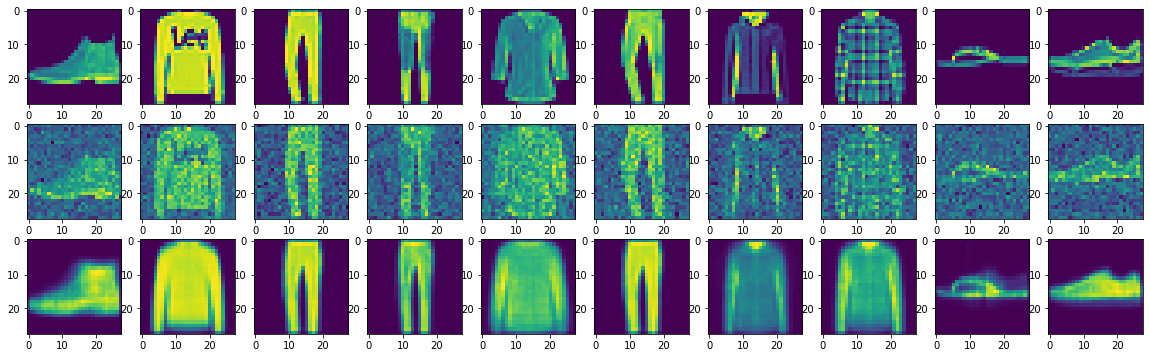

In [ ]:
r_loss2=0
test_image, test_label = next(iter(test_loader))
test_image2 = test_image.view(-1, 784)

# Adding noise to the image
noise = torch.randn(test_image2.size()) * 0.2
noisy_image = test_image2 + noise

# Pass the noisy image to the model
reconstructed_image = model2(noisy_image)
# print(test_image.shape)
# print(noisy_image.shape)
# print(reconstructed_image.shape)
fig, axs = plt.subplots(3, 10, figsize=(20, 6))
for i in range(10):
    r_loss2+=nn.MSELoss()(test_image[i].view(-1,784),reconstructed_image[i])
    axs[0][i].imshow(test_image[i].numpy().squeeze().reshape(28,28))
    axs[1][i].imshow(noisy_image[i].detach().numpy().squeeze().reshape(28,28))
    axs[2][i].imshow(reconstructed_image[i].detach().numpy().squeeze().reshape(28,28))
plt.show()

In [ ]:
print('Reconstruction loss using FC3 is : ', r_loss2.item())

Reconstruction loss using FC3 is :  0.2501034736633301


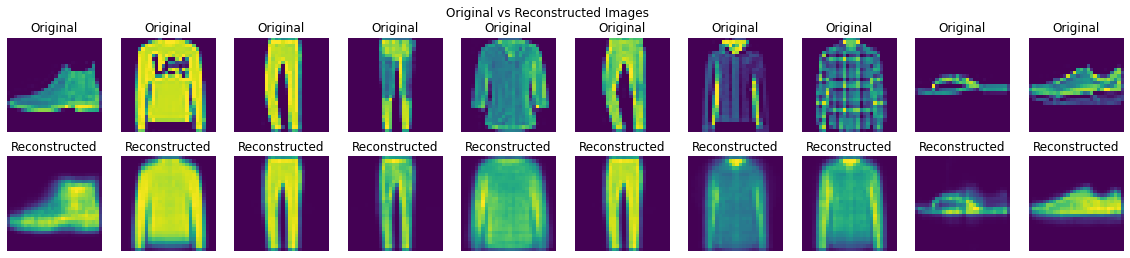

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))
axes = axes.ravel()
for i in range(10):
    image, label = test_data[i]
    image = image.view(-1, 784)
  
    noise = torch.randn(image.size()) * 0.2
    image_noisy = image + noise
   
    reconstructed = model2(image_noisy)
    
    axes[i].imshow(image.view(28, 28))
    axes[i+10].imshow(reconstructed.view(28, 28).detach().numpy())
    axes[i].set_title("Original")
    axes[i+10].set_title("Reconstructed")
    axes[i].axis('off')
    axes[i+10].axis('off')
plt.suptitle("Original vs Reconstructed Images")
plt.show()


### Part 3

In [ ]:
epochs=[1,2,3,4,5,6,7,8,9,10]

####plots for fc1

In [ ]:
loss_train

[1.9112251996994019,
 1.8599529266357422,
 1.8774590492248535,
 1.7972761392593384,
 1.8134406805038452,
 1.8118594884872437,
 1.8085750341415405,
 1.7677083015441895,
 1.7860294580459595,
 1.7922459840774536]

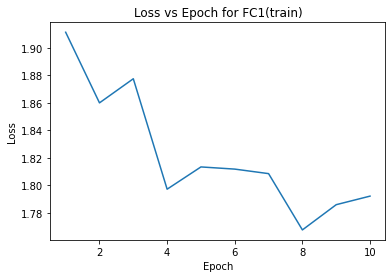

In [ ]:
plt.plot(epochs, loss_train)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for FC1(train)')
plt.show()

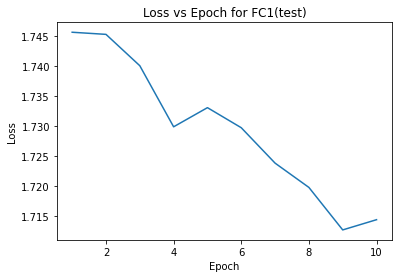

In [ ]:
plt.plot(epochs, loss_test1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for FC1(test)')
plt.show()

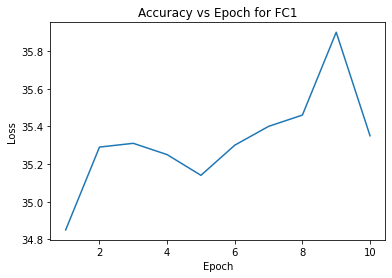

In [ ]:
plt.plot(epochs, acc_fc1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy vs Epoch for FC1')
plt.show()

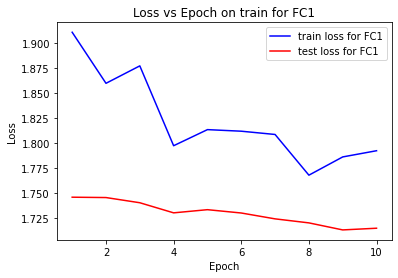

In [ ]:
plt.plot(epochs, loss_train, 'b-', label='train loss for FC1')
plt.plot(epochs, loss_test1, 'r-', label='test loss for FC1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch on train for FC1')
plt.legend()
plt.show()

####plots for fc3

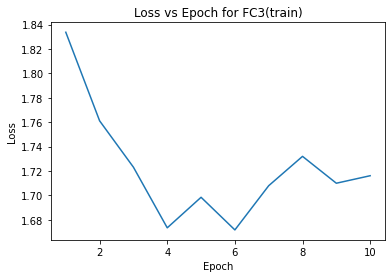

In [ ]:
plt.plot(epochs, loss_train2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for FC3(train)')
plt.show()

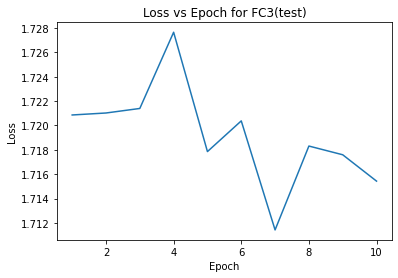

In [ ]:
plt.plot(epochs, loss_test2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch for FC3(test)')
plt.show()

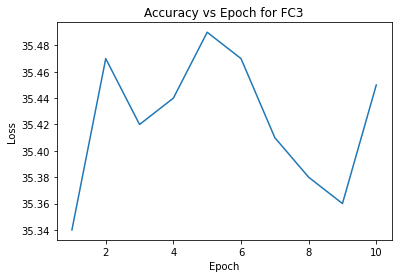

In [ ]:
plt.plot(epochs, acc_fc2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy vs Epoch for FC3')
plt.show()

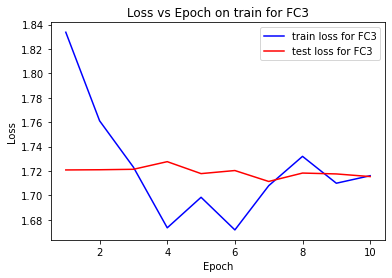

In [ ]:
plt.plot(epochs, loss_train2, 'b-', label='train loss for FC3')
plt.plot(epochs, loss_test2, 'r-', label='test loss for FC3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch on train for FC3')
plt.legend()
plt.show()

####comapiring fc1 and fc3

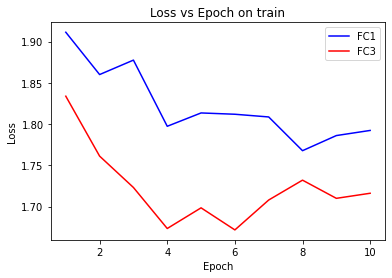

In [ ]:
plt.plot(epochs, loss_train, 'b-', label='FC1')
plt.plot(epochs, loss_train2, 'r-', label='FC3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch on train')
plt.legend()
plt.show()

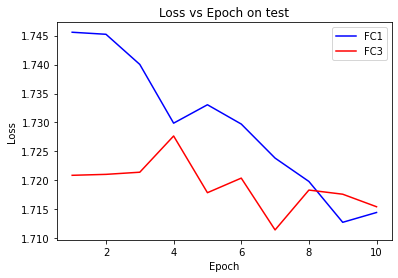

In [ ]:
plt.plot(epochs, loss_test1, 'b-', label='FC1')
plt.plot(epochs, loss_test2, 'r-', label='FC3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch on test')
plt.legend()
plt.show()

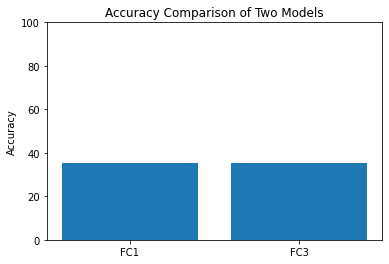

In [ ]:
plt.bar(['FC1', 'FC3'], [np.mean(acc_fc1),np.mean(acc_fc2)])
plt.ylim(0,100)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Two Models')
plt.show()

**Note:** our prime focus was on concepts, and not improving and optimization of accuracies
<br>
hence focus was not kept there

### Part 4

#### tsne plot for FC1 model

In [ ]:
tsne = TSNE(n_components=2, random_state=0)

tsne_data = tsne.fit_transform(embed_tensor)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


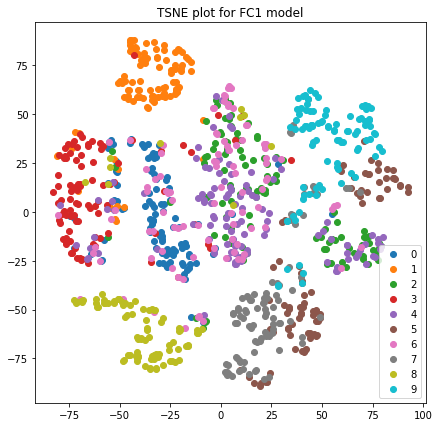

In [ ]:
scatter_x = tsne_data[:1000,0]
scatter_y = tsne_data[:1000,1]
group = label_tensor[:1000]

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.title('TSNE plot for FC1 model')
plt.show()


#### tsne plot FC3 model

In [ ]:
tsne2 = TSNE(n_components=2, random_state=0)

tsne_data2 = tsne2.fit_transform(embed_tensor2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


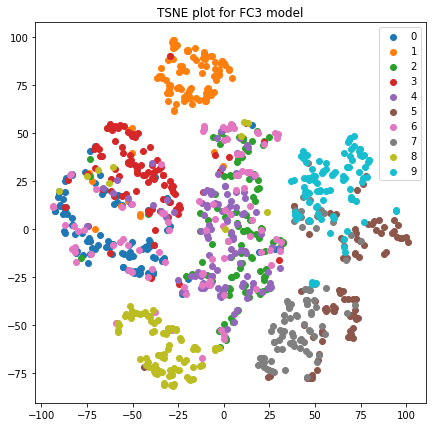

In [ ]:
scatter_x2 = tsne_data2[:1000,0]
scatter_y2 = tsne_data2[:1000,1]
group2 = label_tensor2[:1000]

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group2):
    ix = np.where(group2 == g)
    ax.scatter(scatter_x2[ix], scatter_y2[ix],  label = g)
ax.legend()
plt.title('TSNE plot for FC3 model')
plt.show()


<h4> PC3 seems to be having less intraclass variation and more interclass variation as compared to PC1</h4>

***Note:*** Some references were taken from the demo colab shared, along with internet (from a few sites)
for seeing and learning how to write the codes for training and testing the model.<br>
pytorch documentation was also used for defining the architecture of autoencoder

<h1> <center> ---------------------------------------------------- Thank You ---------------------------------------------------- </center></h1>